In [ ]:
from sklearn.linear_model import Ridge  #리짓 회귀: 과대적합을 감소시키기위해 규제가 추가된 선형 회귀
import numpy as np


m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.91240715]])

In [ ]:
from sklearn.linear_model import SGDRegressor   #확률적 경사 하강법 사용

sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.89436266])

In [ ]:
from sklearn.linear_model import Lasso  #라쏘 회귀: 선형회귀의 또 다른 규제된 버전

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.24550018])

In [ ]:
from sklearn.linear_model import ElasticNet #엘라스틱넷: 릿지 회귀와 라쏘 회귀를 절충한 모델

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)   #l1_ratio = 혼합 비율r, r이 0이면 릿지 회귀와 같고 1이면 라쏘 회귀와 같다.
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.24335582])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import clone


X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), 
                                                  test_size=0.5, random_state=10)

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,    #warm_start=True로 지정하면 fit() 메서드가 호출될 때 처음부터 다시 시작하지않고 이전 모델 파라미터에서 훈련을 이어나감
                       learning_rate='constant', eta0=5e-4)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        mininum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [ ]:
from sklearn import datasets

iris = datasets.load_iris() #붓꽃데이터 로드
print(list(iris.keys()))
X = iris['data'][:, 3:] #꽃잎의 너비
y = (iris['target'] == 2).astype(np.int)    #Iris-Virginica면 1, 그렇지 않으면 0

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


In [ ]:
from sklearn.linear_model import LogisticRegression #로지스틱 회귀는 샘플이 특정 클래스에 속할 확률을 추정하는데 널리 사용됨

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

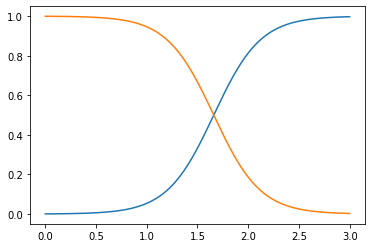

In [ ]:
import matplotlib.pyplot as plt #꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정확률

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], label='Not Iris virginica')

In [ ]:
log_reg.predict([[1.7], [1.5]]) #꽃잎 너비가 1.6cm보다 크면 분류기는 Iris-Verginica로 분류(1) 1.6보다 작으면 아니라고 예측(0)

array([1, 0])

In [ ]:
X = iris['data'][:, (2, 3)] #꽃잎 길이, 꽃잎 너비
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)   #소프트맥스 회귀 분류가는 다중 클래스이고 한번에 하나의 클래스만 예측합니다.  
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
softmax_reg.predict([[5,2]])
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])